<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-125/blob/main/Reto1_EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

##Base de datos

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-125/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
                 sep=',',
                 encoding='cp1252')

#df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-125/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
#                 sep=',',
#                 encoding='cp1252')
                 
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Limpieza de base de datos.

In [ ]:
df.shape

(1068, 57)

In [ ]:
null_list=[]
for c in df:
  if ((df[c].isnull().sum()/df.shape[0]*100).round(2))>0:
    null_list.append(c)
    print(c,'\t\t', (df[c].isnull().sum()/df.shape[0]*100).round(2), '%')

ALC_mg/L 		 0.37 %
CALIDAD_ALC 		 0.37 %
CONDUCT_mS/cm 		 0.56 %
CALIDAD_CONDUC 		 0.56 %
SDT_mg/L 		 100.0 %
SDT_M_mg/L 		 0.19 %
CALIDAD_SDT_ra 		 0.19 %
CALIDAD_SDT_salin 		 0.19 %
DUR_mg/L 		 0.09 %
CALIDAD_DUR 		 0.09 %
N_NO3_mg/L 		 0.09 %
CALIDAD_N_NO3 		 0.09 %
CONTAMINANTES 		 40.64 %


In [ ]:
ndf=df.copy()
ndf.drop(columns=['SDT_mg/L','CONTAMINANTES'], inplace=True)
null_list.remove('SDT_mg/L')
null_list.remove('CONTAMINANTES')
ndf.shape

(1068, 55)

In [ ]:
ndf[null_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALC_mg/L           1064 non-null   float64
 1   CALIDAD_ALC        1064 non-null   object 
 2   CONDUCT_mS/cm      1062 non-null   float64
 3   CALIDAD_CONDUC     1062 non-null   object 
 4   SDT_M_mg/L         1066 non-null   object 
 5   CALIDAD_SDT_ra     1066 non-null   object 
 6   CALIDAD_SDT_salin  1066 non-null   object 
 7   DUR_mg/L           1067 non-null   object 
 8   CALIDAD_DUR        1067 non-null   object 
 9   N_NO3_mg/L         1067 non-null   object 
 10  CALIDAD_N_NO3      1067 non-null   object 
dtypes: float64(2), object(9)
memory usage: 91.9+ KB


In [ ]:
ndf[null_list].describe(include='all')

,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,DUR_mg/L,CALIDAD_DUR,N_NO3_mg/L,CALIDAD_N_NO3
count,1064.000000,1064,1062.000000,1062,1066,1066,1066,1067,1067,1067,1067
unique,NaN,4,NaN,5,925,5,4,889,4,995,3
top,NaN,Alta,NaN,Permisible para riego,496,Excelente para riego,Potable - Dulce,<20,Potable - Dura,<0.02,Potable - Excelente
freq,NaN,794,NaN,460,4,491,834,26,577,65,788
mean,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


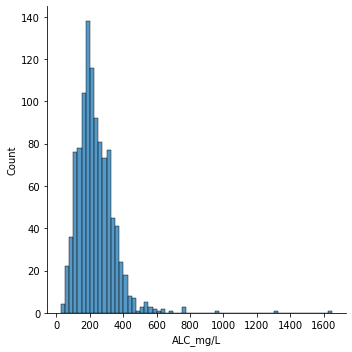

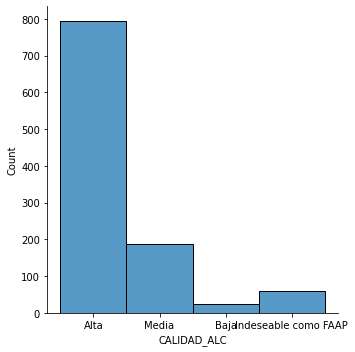

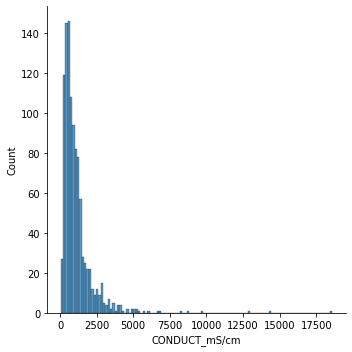

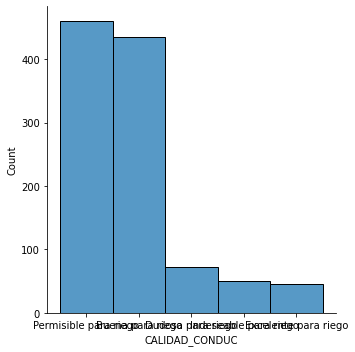

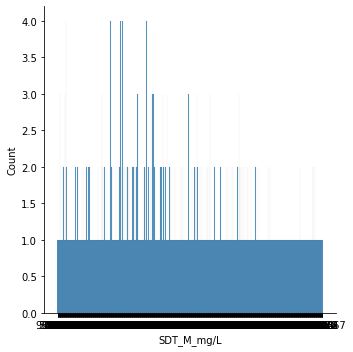

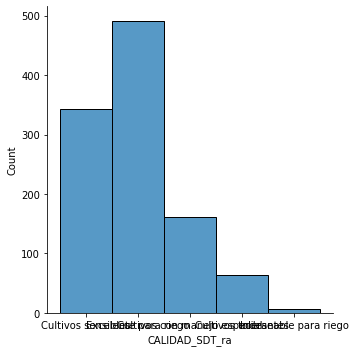

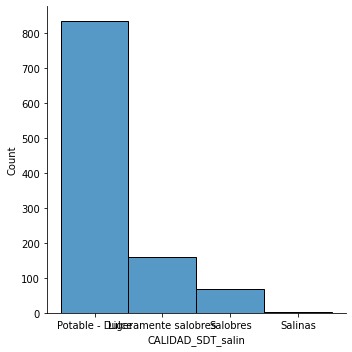

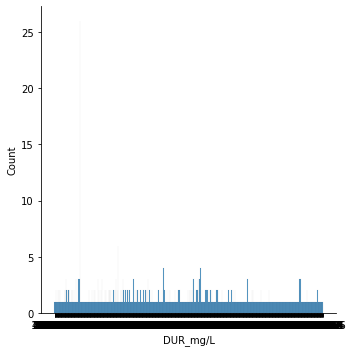

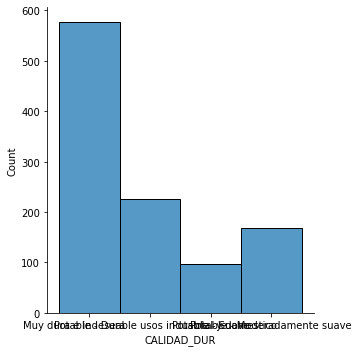

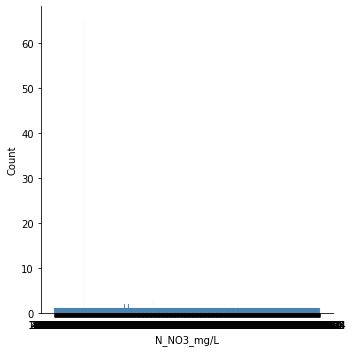

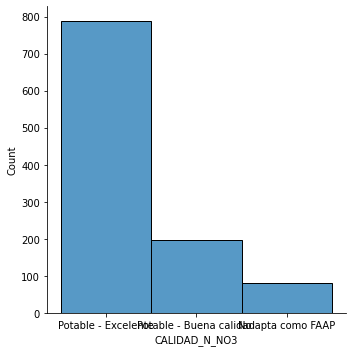

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for n in null_list:
  #fig, ax = plt.subplots()# figsize=(10,8))
  sns.displot(ndf[n])

In [ ]:
cuant = ['ALC_mg/L',
         'CONDUCT_mS/cm']        
cual  = ['CALIDAD_ALC',
         'CALIDAD_CONDUC', 
         'SDT_M_mg/L',
         'CALIDAD_SDT_ra', 
         'CALIDAD_SDT_salin',
         'DUR_mg/L', 
         'CALIDAD_DUR', 
         'N_NO3_mg/L', 
         'CALIDAD_N_NO3']

In [ ]:
for c in cuant:
  ndf[c]=ndf[c].fillna(ndf[c].median())
for c in cual:
  ndf[c]=ndf[c].fillna(ndf[c].mode()[0])

In [ ]:
ndf.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
ndf.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'],
      dtype='object')

In [ ]:
ndf.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052
std,6.703263,3.887670,0.0,116.661485,1242.292889
min,-116.664250,14.561150,2020.0,26.640000,50.400000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000


In [ ]:
cual_col=[]
num_col=[]
for n in ndf:
  if (ndf[n].dtype)=='object':
    cual_col.append(n)
  else:
    num_col.append(n)

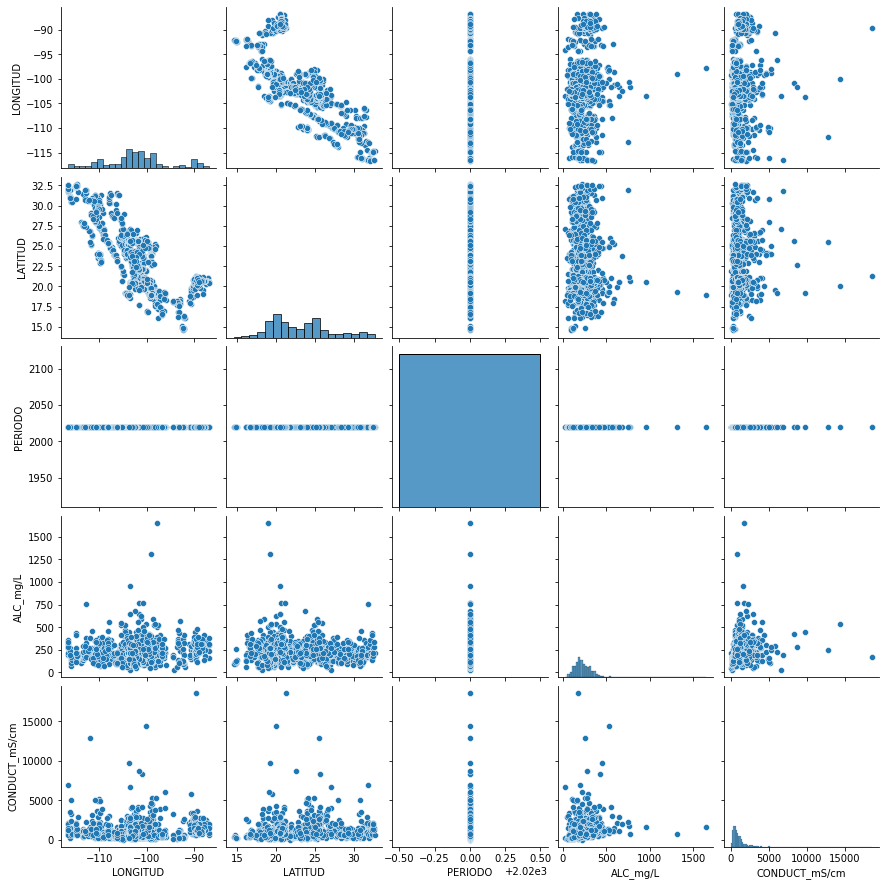

In [ ]:
sns.pairplot(ndf[num_col])

In [ ]:
cual_col

['CLAVE',
 'SITIO',
 'ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'SDT_M_mg/L',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'FLUORUROS_mg/L',
 'CALIDAD_FLUO',
 'DUR_mg/L',
 'CALIDAD_DUR',
 'COLI_FEC_NMP/100_mL',
 'CALIDAD_COLI_FEC',
 'N_NO3_mg/L',
 'CALIDAD_N_NO3',
 'AS_TOT_mg/L',
 'CALIDAD_AS',
 'CD_TOT_mg/L',
 'CALIDAD_CD',
 'CR_TOT_mg/L',
 'CALIDAD_CR',
 'HG_TOT_mg/L',
 'CALIDAD_HG',
 'PB_TOT_mg/L',
 'CALIDAD_PB',
 'MN_TOT_mg/L',
 'CALIDAD_MN',
 'FE_TOT_mg/L',
 'CALIDAD_FE',
 'SEMAFORO',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

In [ ]:
n_cual_col = ['ORGANISMO_DE_CUENCA',
 'ESTADO',
  'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CD_TOT_mg/L',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'PB_TOT_mg/L',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

In [ ]:
for n in cual_col:
  print(ndf[n].value_counts())

DLAGU6         1
OCGCE3209      1
OCFSU2993      1
OCFSU2994      1
OCFSU3048      1
              ..
DLHID6458      1
DLHID6461      1
DLHID6463      1
DLHID6467      1
OCRBR5109M1    1
Name: CLAVE, Length: 1068, dtype: int64
EL FUERTE                           2
POZO VILLA UNION                    2
POZO BERRIOZABAL                    1
RANCHO GIUSEPPE CONSTANZO           1
QUINTA 2 POTRILLOS                  1
                                   ..
POZO SAN FRANCISCO BOJAY COLONIA    1
POZO SANTA ANA AHUEHUEPAN           1
POZO SANTA MARIA DAXTHO             1
POZO PEDRO MARIA ANAYA              1
COMUNIDAD LA REFORMA                1
Name: SITIO, Length: 1066, dtype: int64
CUENCAS CENTRALES DEL NORTE     232
LERMA SANTIAGO PACIFICO         170
PENINSULA DE YUCATAN            125
NOROESTE                         94
PENINSULA DE BAJA CALIFORNIA     89
BALSAS                           69
RIO BRAVO                        65
PACIFICO NORTE                   62
GOLFO NORTE                

In [ ]:
print(c, ndf[cual_col].nunique())#.size)
#ndf['ACUIFERO'].nunique()

CALIDAD_N_NO3 CLAVE                   1068
SITIO                   1066
ORGANISMO_DE_CUENCA       13
ESTADO                    32
MUNICIPIO                452
ACUIFERO                 273
SUBTIPO                    8
CALIDAD_ALC                4
CALIDAD_CONDUC             5
SDT_M_mg/L               925
CALIDAD_SDT_ra             5
CALIDAD_SDT_salin          4
FLUORUROS_mg/L           862
CALIDAD_FLUO               4
DUR_mg/L                 889
CALIDAD_DUR                4
COLI_FEC_NMP/100_mL      125
CALIDAD_COLI_FEC           5
N_NO3_mg/L               995
CALIDAD_N_NO3              3
AS_TOT_mg/L              209
CALIDAD_AS                 3
CD_TOT_mg/L                3
CALIDAD_CD                 2
CR_TOT_mg/L              168
CALIDAD_CR                 2
HG_TOT_mg/L               61
CALIDAD_HG                 2
PB_TOT_mg/L               31
CALIDAD_PB                 2
MN_TOT_mg/L              362
CALIDAD_MN                 3
FE_TOT_mg/L              615
CALIDAD_FE                 2


In [ ]:
for c in cual_col:
  if ("CALIDAD" not in c):
    print('"'+c+'"'+',')           

"CLAVE",
"SITIO",
"ORGANISMO_DE_CUENCA",
"ESTADO",
"MUNICIPIO",
"ACUIFERO",
"SUBTIPO",
"SDT_M_mg/L",
"FLUORUROS_mg/L",
"DUR_mg/L",
"COLI_FEC_NMP/100_mL",
"N_NO3_mg/L",
"AS_TOT_mg/L",
"CD_TOT_mg/L",
"CR_TOT_mg/L",
"HG_TOT_mg/L",
"PB_TOT_mg/L",
"MN_TOT_mg/L",
"FE_TOT_mg/L",
"SEMAFORO",
"CUMPLE_CON_ALC",
"CUMPLE_CON_COND",
"CUMPLE_CON_SDT_ra",
"CUMPLE_CON_SDT_salin",
"CUMPLE_CON_FLUO",
"CUMPLE_CON_DUR",
"CUMPLE_CON_CF",
"CUMPLE_CON_NO3",
"CUMPLE_CON_AS",
"CUMPLE_CON_CD",
"CUMPLE_CON_CR",
"CUMPLE_CON_HG",
"CUMPLE_CON_PB",
"CUMPLE_CON_MN",
"CUMPLE_CON_FE",


In [ ]:
num_posibles=["SDT_M_mg/L",
"FLUORUROS_mg/L",
"DUR_mg/L",
"COLI_FEC_NMP/100_mL",
"N_NO3_mg/L",
"AS_TOT_mg/L",
"CD_TOT_mg/L",
"CR_TOT_mg/L",
"HG_TOT_mg/L",
"PB_TOT_mg/L",
"MN_TOT_mg/L",
"FE_TOT_mg/L"]

In [ ]:
ndf[num_posibles].describe(include='all')

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,925,862,889,125,995,209,3,168,61,31,362,615
top,292,<0.2,<20,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
freq,6,162,27,737,66,815,1066,854,968,1038,545,401


In [ ]:
ndf[num_posibles]=ndf[num_posibles].replace({'<':''}, regex=True)
ndf[num_posibles]=ndf[num_posibles].astype(float)

In [ ]:
ndf[num_posibles].describe()

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,894.970290,1.075600,347.631015,355.490356,4.315733,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,2749.074810,1.924278,359.640893,2052.457014,8.342260,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,337.383325,0.267175,120.956900,1.100000,0.646229,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,548.600000,0.503500,245.175900,1.100000,2.080766,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


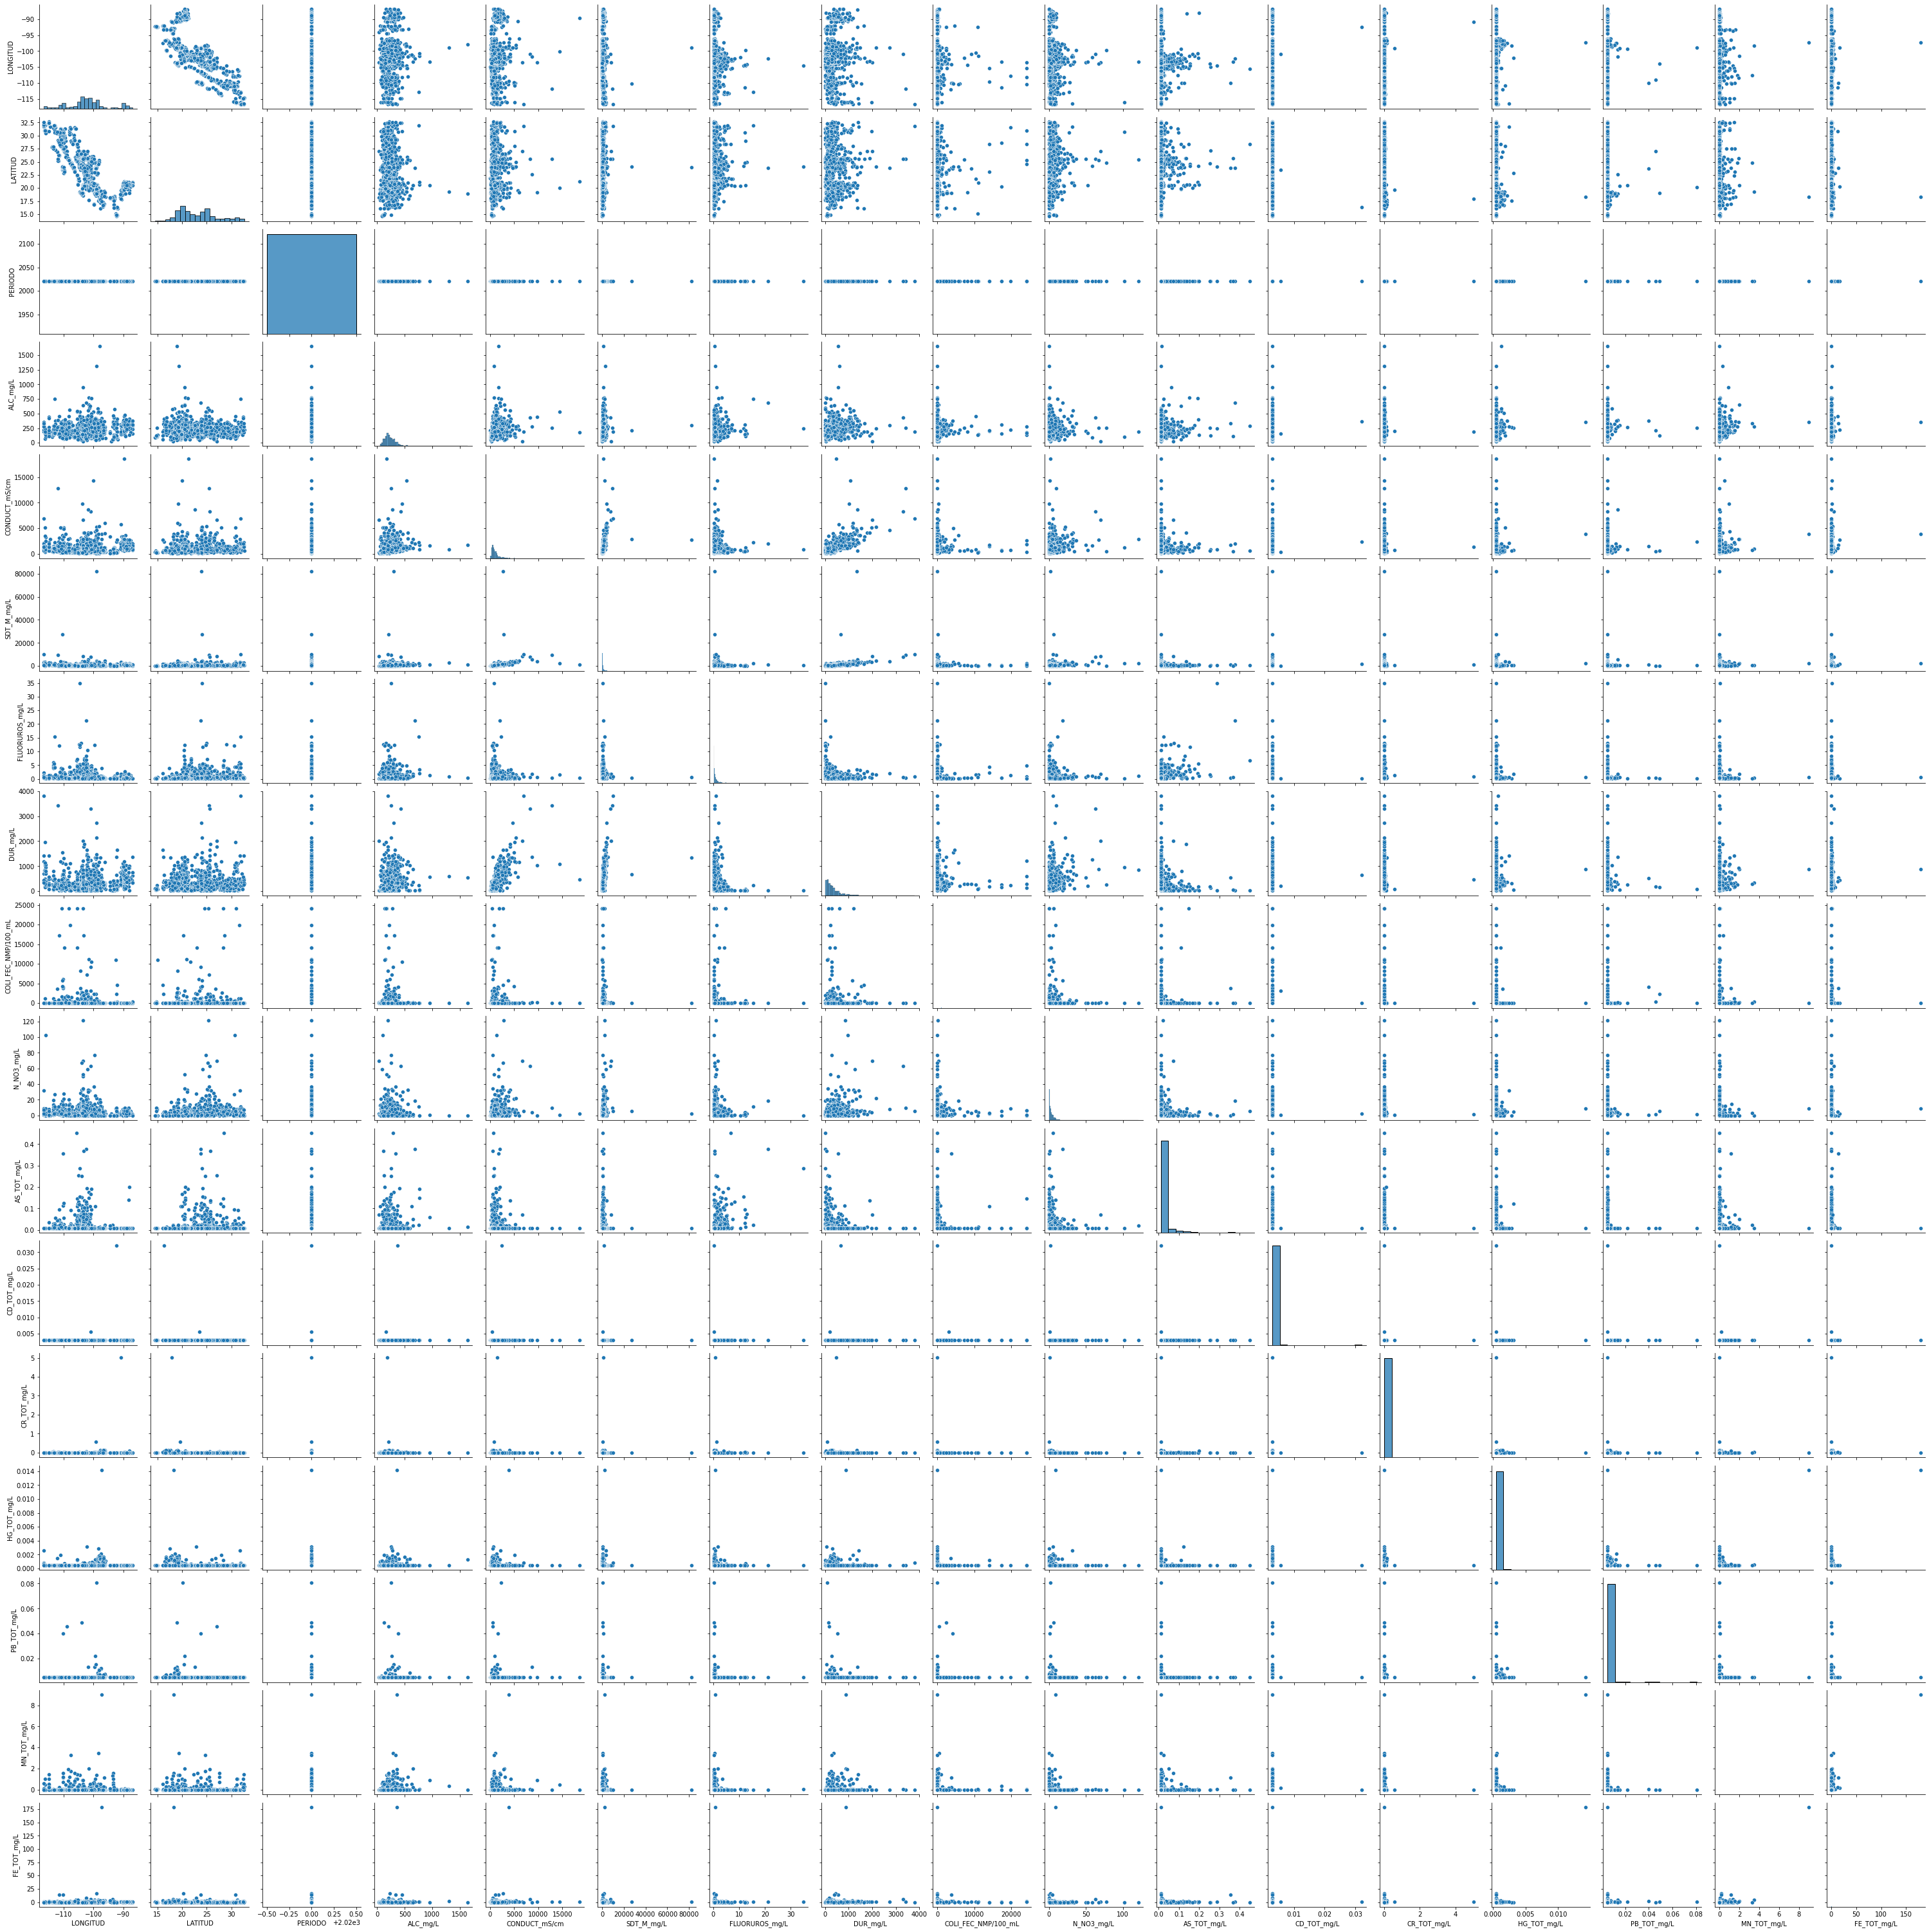

In [ ]:
num_col.extend(num_posibles)
#sns.pairplot(ndf[num_posibles])
sns.pairplot(ndf[num_col])

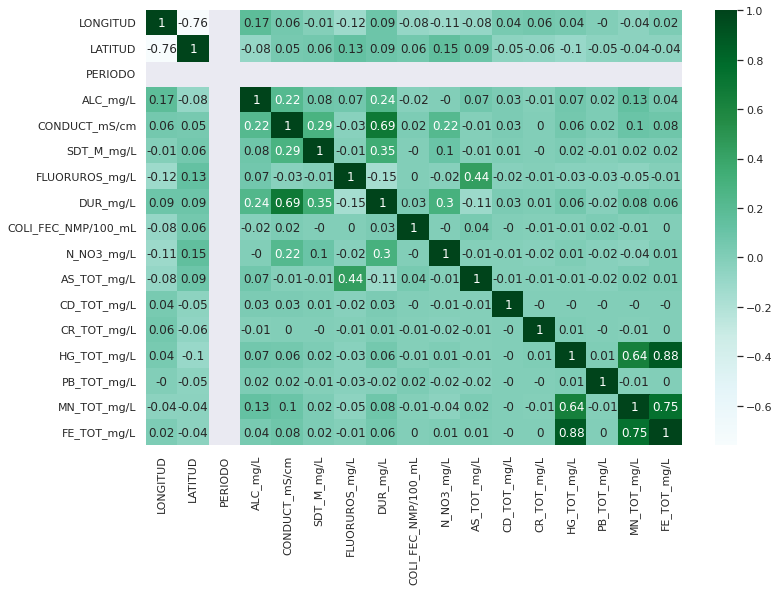

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) 

datos=ndf[num_col].corr(method='pearson', min_periods=1).round(2)
mapa_corr_pearson = sns.heatmap(datos, annot = True, cmap="BuGn") 


plt.show(mapa_corr_pearson)

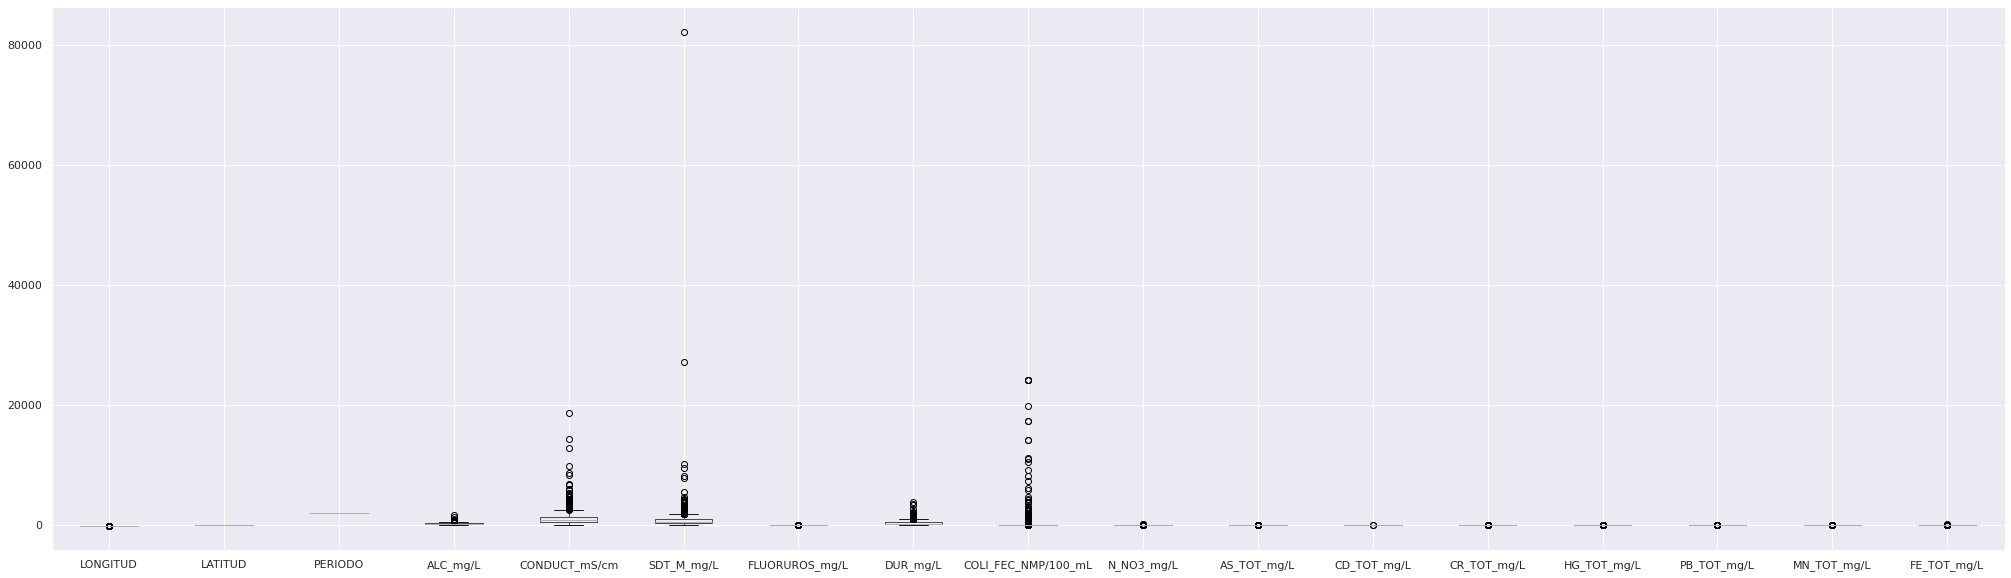

In [ ]:
plt.rcParams["figure.figsize"] = [35, 10]
ndf[num_col].boxplot()

In [ ]:
n_cual_col.remove('PB_TOT_mg/L')
n_cual_col.remove('CD_TOT_mg/L')
n_cual_col

['ORGANISMO_DE_CUENCA',
 'ESTADO',
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

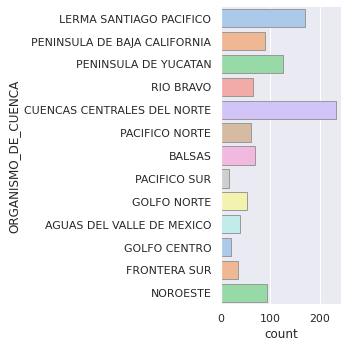

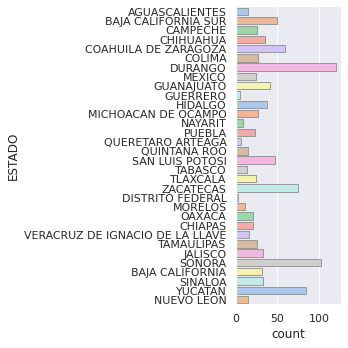

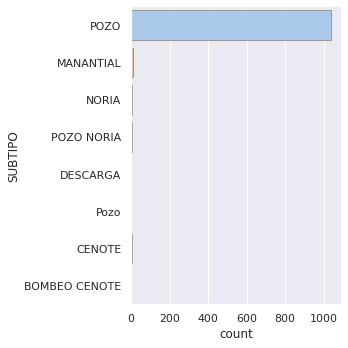

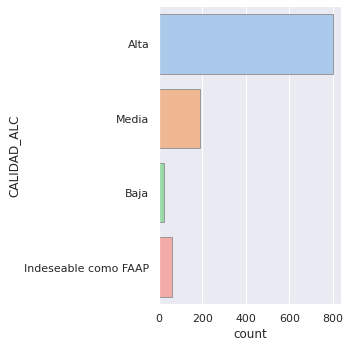

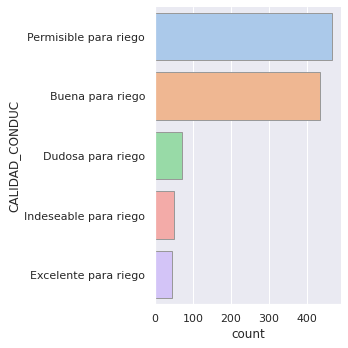

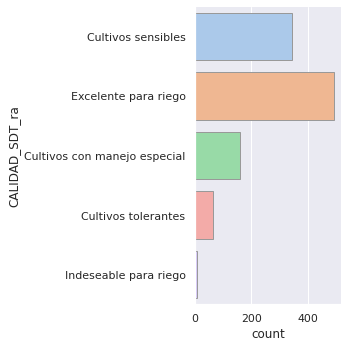

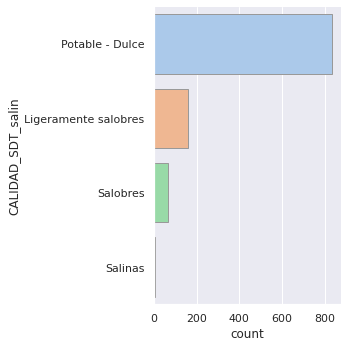

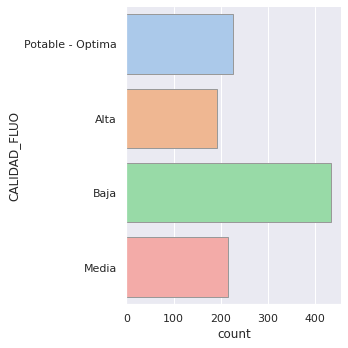

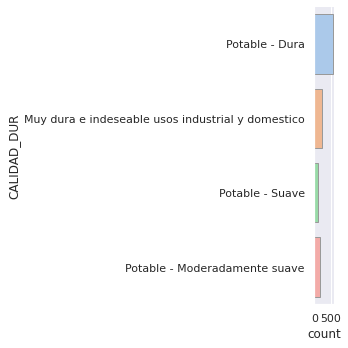

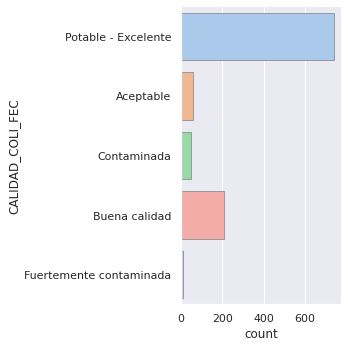

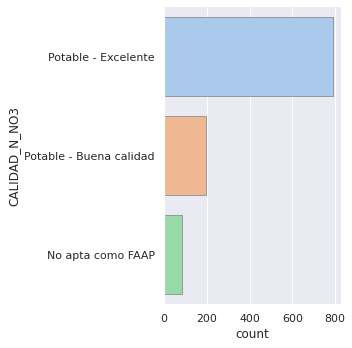

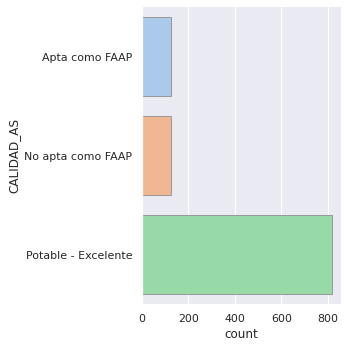

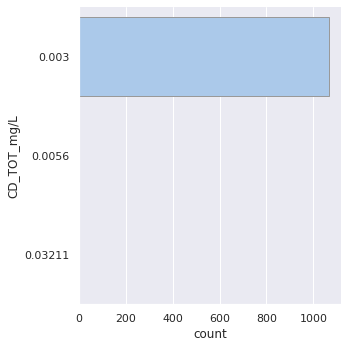

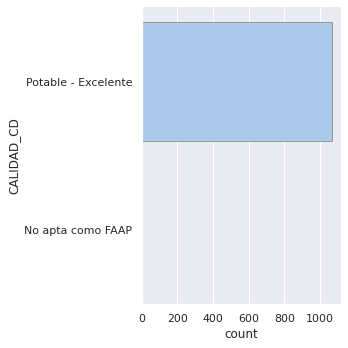

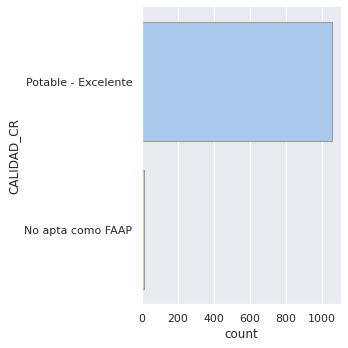

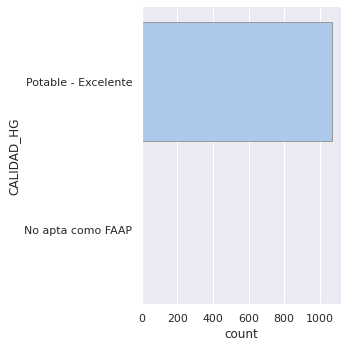

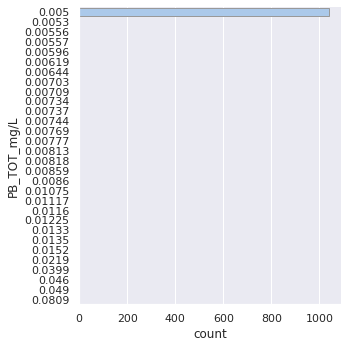

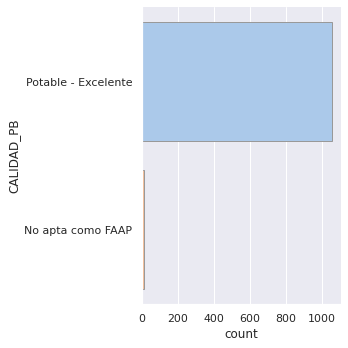

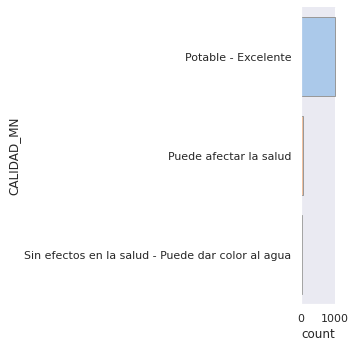

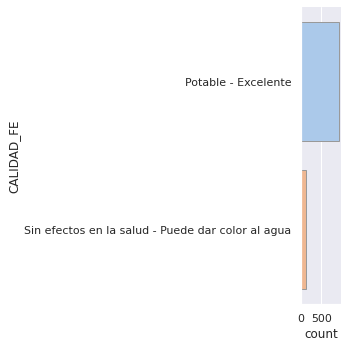

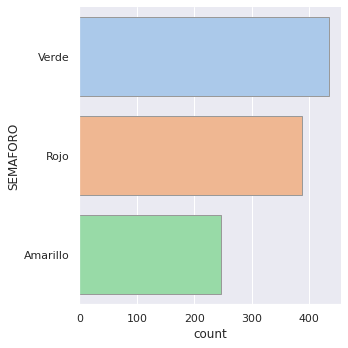

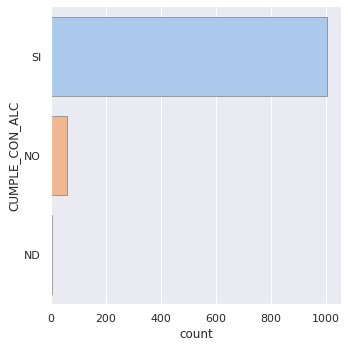

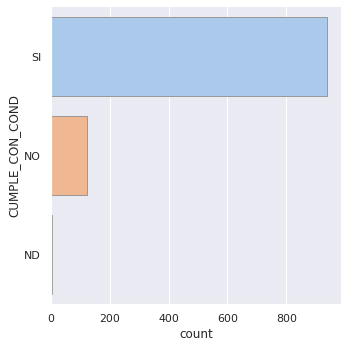

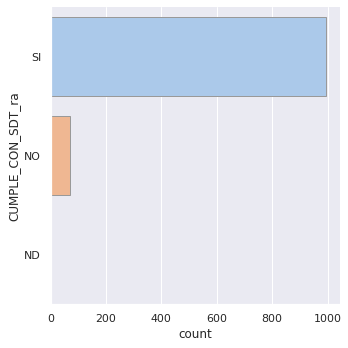

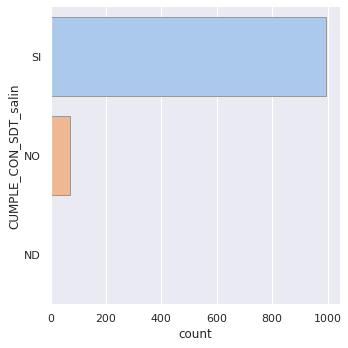

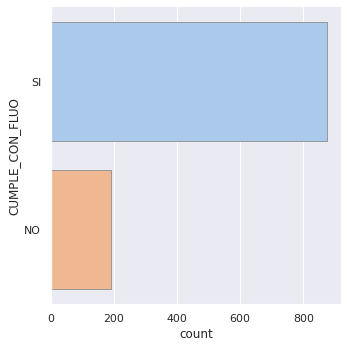

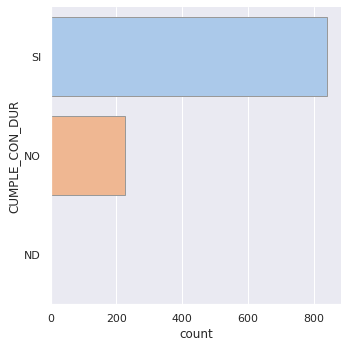

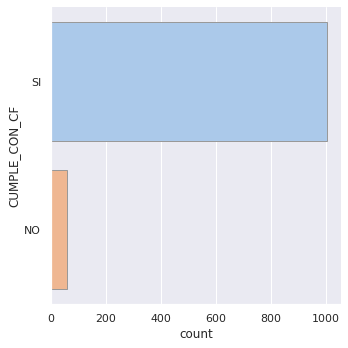

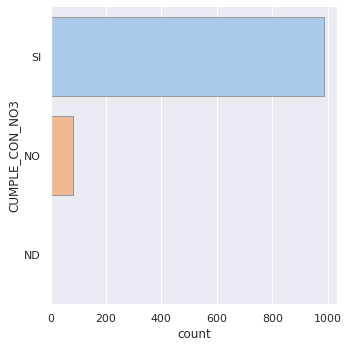

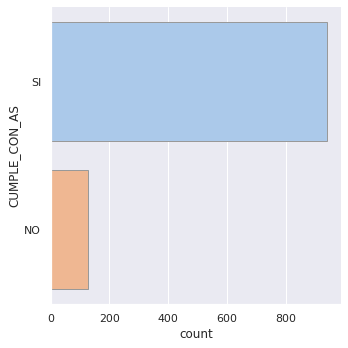

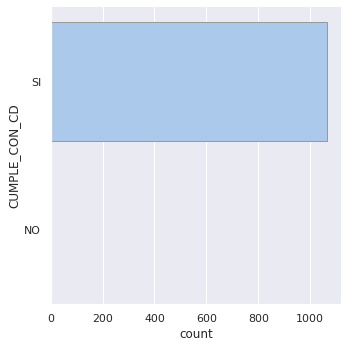

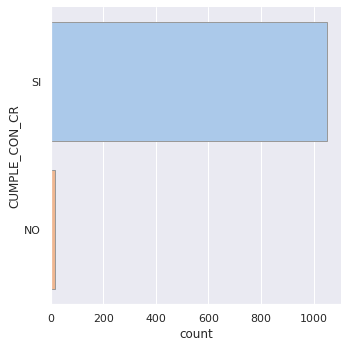

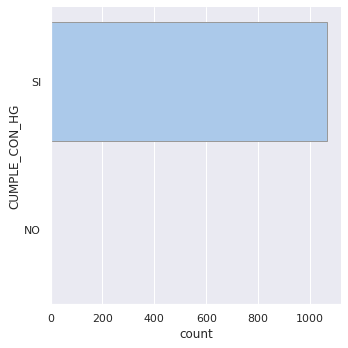

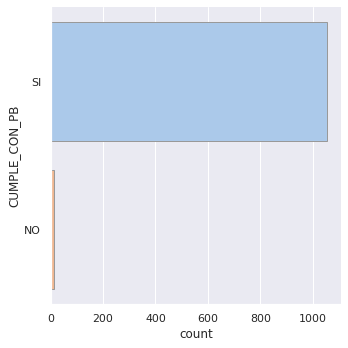

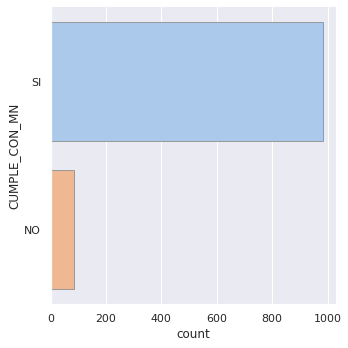

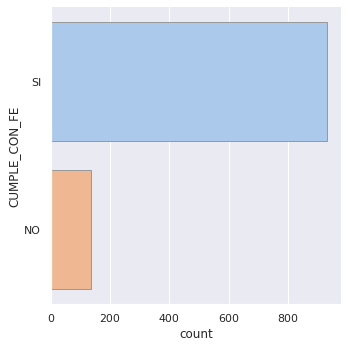

In [ ]:
for c in ndf[n_cual_col]:
  sns.catplot(
      data=ndf, 
      y=c, 
      #hue="class", 
      kind="count",
      palette="pastel",
      edgecolor=".6",
)


In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 582 kB/s 
     |████████████████████████████████| 1.0 MB 46.9 MB/s 
     |████████████████████████████████| 1.7 MB 37.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 45.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=c4d6fb1e108161a19642de2f6c4b0abfd9f781901ab5d22f8b253a45320637d3
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e638d386e17842f6a9adc41c1acdee39f2510c13c54466005a760b60bc024971
  Stored in directory: /root/.

In [ ]:
latlong=ndf[["LATITUD","LONGITUD"]]#ndf.columns

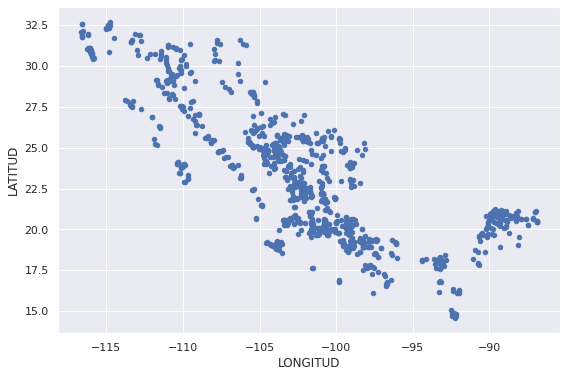

In [ ]:
plt.rcParams["figure.figsize"] = [9, 6]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
ndf["Coordinates"] = list(zip(ndf.LONGITUD, ndf.LATITUD))
ndf["Coordinates"] = ndf["Coordinates"].apply(Point)
ndf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [290]:
calidad = []
for c in ndf.columns:
  if 'CALIDAD' in c:
    calidad.append(c)
    print(c)

CALIDAD_ALC
CALIDAD_CONDUC
CALIDAD_SDT_ra
CALIDAD_SDT_salin
CALIDAD_FLUO
CALIDAD_DUR
CALIDAD_COLI_FEC
CALIDAD_N_NO3
CALIDAD_AS
CALIDAD_CD
CALIDAD_CR
CALIDAD_HG
CALIDAD_PB
CALIDAD_MN
CALIDAD_FE


In [300]:
for c in calidad:
  print(c, ndf[c].unique())

CALIDAD_ALC ['Alta' 'Media' 'Baja' 'Indeseable como FAAP']
CALIDAD_CONDUC ['Permisible para riego' 'Buena para riego' 'Dudosa para riego'
 'Indeseable para riego' 'Excelente para riego']
CALIDAD_SDT_ra ['Cultivos sensibles' 'Excelente para riego'
 'Cultivos con manejo especial' 'Cultivos tolerantes'
 'Indeseable para riego']
CALIDAD_SDT_salin ['Potable - Dulce' 'Ligeramente salobres' 'Salobres' 'Salinas']
CALIDAD_FLUO ['Potable - Optima' 'Alta' 'Baja' 'Media']
CALIDAD_DUR ['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico'
 'Potable - Suave' 'Potable - Moderadamente suave']
CALIDAD_COLI_FEC ['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad'
 'Fuertemente contaminada']
CALIDAD_N_NO3 ['Potable - Excelente' 'Potable - Buena calidad' 'No apta como FAAP']
CALIDAD_AS ['Apta como FAAP' 'No apta como FAAP' 'Potable - Excelente']
CALIDAD_CD ['Potable - Excelente' 'No apta como FAAP']
CALIDAD_CR ['Potable - Excelente' 'No apta como FAAP']
CALIDAD_HG ['Potable - Ex

In [301]:
#Name: CALIDAD_ALC, dtype: int64
scale_alc = {"Alta":1,
             "Media":.75,
             "Indeseable como FAAP":.25,
             "Baja":.50                     }
ndf['ALC_score']=ndf['CALIDAD_ALC'].replace(scale_alc)

#Name: CALIDAD_CONDUC, dtype: int64
scale_conduc = {"Permisible para riego":.6,
                "Buena para riego":.8,
                "Dudosa para riego":.4,
                "Indeseable para riego":.2,
                "Excelente para riego":1
                }
ndf['CONDUC_score']=ndf['CALIDAD_CONDUC'].replace(scale_conduc)

#Name: CALIDAD_SDT_ra, dtype: int64
scale_sdt_ra = {"Excelente para riego":1,
                "Cultivos sensibles":.8,
                "Cultivos con manejo especial":.6, 
                "Cultivos tolerantes":.4,
                "Indeseable para riego":.2
                }          
ndf['STD_ra_score']=ndf['CALIDAD_SDT_ra'].replace(scale_sdt_ra)

#Name: CALIDAD_SDT_salin, dtype: int64
scale_std_salin = {"Potable - Dulce":1,
                   "Ligeramente salobres":.75,
                   "Salobres":.5,
                   "Salinas":.25                   
                   }
ndf['STD_ra_salin_score']=ndf['CALIDAD_SDT_salin'].replace(scale_std_salin)

#CALIDAD_FLUO ['Potable - Optima' 'Alta' 'Baja' 'Media']
scale_fluo = {'Potable - Optima':1,
              'Alta':.75,
              'Baja':.25,
              'Media':.5                  
                   }
ndf['FLUO_score']=ndf['CALIDAD_FLUO'].replace(scale_fluo)

#CALIDAD_DUR ['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico' 'Potable - Suave' 'Potable - Moderadamente suave']
scale_dur = {'Potable - Dura':.5,
             'Muy dura e indeseable usos industrial y domestico':.25,
             'Potable - Suave':.1,
             'Potable - Moderadamente suave':.75
                   }
ndf['DUR_score']=ndf['CALIDAD_DUR'].replace(scale_dur)

#CALIDAD_COLI_FEC ['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad' 'Fuertemente contaminada']
scale_coli = {'Potable - Excelente':1,
              'Aceptable' 'Contaminada':.5,
              'Buena calidad':.75,
              'Fuertemente contaminada':.25
                   }
ndf['COLI_score']=ndf['CALIDAD_COLI_FEC'].replace(scale_coli)

#CALIDAD_N_NO3 ['Potable - Excelente' 'Potable - Buena calidad' 'No apta como FAAP']
scale_no3 = {'Potable - Excelente':1,
             'Potable - Buena calidad':.66,
             'No apta como FAAP':.34
                   }
ndf['NO3_score']=ndf['CALIDAD_N_NO3'].replace(scale_no3)

#CALIDAD_AS ['Apta como FAAP' 'No apta como FAAP' 'Potable - Excelente']
scale_as = {'Apta como FAAP':.66,
            'No apta como FAAP':.34,
            'Potable - Excelente':.1
                   }
ndf['COLI_score']=ndf['CALIDAD_AS'].replace(scale_as)

#CALIDAD_CD []
scale_cd = {'Potable - Excelente':1, 'No apta como FAAP':0
                   }
ndf['CD_score']=ndf['CALIDAD_CD'].replace(scale_cd)

#CALIDAD_CR ['Potable - Excelente' 'No apta como FAAP']
scale_cr = {'Potable - Excelente':1, 'No apta como FAAP':0
                   }
ndf['CR_score']=ndf['CALIDAD_CR'].replace(scale_cr)

#CALIDAD_HG ['Potable - Excelente' 'No apta como FAAP']
scale_hg = {'Potable - Excelente':1, 'No apta como FAAP':0
                   }
ndf['HG_score']=ndf['CALIDAD_HG'].replace(scale_hg)

#CALIDAD_PB ['Potable - Excelente' 'No apta como FAAP']
scale_pb = {'Potable - Excelente':1, 'No apta como FAAP':0
                   }
ndf['PB_score']=ndf['CALIDAD_PB'].replace(scale_pb)

#CALIDAD_MN ['Potable - Excelente' 'Puede afectar la salud' 'Sin efectos en la salud - Puede dar color al agua']
scale_mn = {'Potable - Excelente' 'Puede afectar la salud':1, 'Sin efectos en la salud - Puede dar color al agua':0
                   }
ndf['MN_score']=ndf['CALIDAD_MN'].replace(scale_mn)

#CALIDAD_FE ['Potable - Excelente' 'Sin efectos en la salud - Puede dar color al agua']
scale_fe = {'Potable - Excelente':1, 'Sin efectos en la salud - Puede dar color al agua':0
                   }
ndf['FE_score']=ndf['CALIDAD_FE'].replace(scale_fe)

In [307]:
for c in ndf.columns:
  if 'score' in c:
    print("'"+c+"'"+",")

'ALC_score',
'CONDUC_score',
'STD_ra_score',
'STD_ra_salin_score',
'FLUO_score',
'DUR_score',
'COLI_score',
'NO3_score',
'CD_score',
'CR_score',
'HG_score',
'PB_score',
'MN_score',
'FE_score',


In [308]:
ndf['average'] = ndf[['ALC_score',
'CONDUC_score',
'STD_ra_score',
'STD_ra_salin_score',
'FLUO_score',
'DUR_score',
'COLI_score',
'NO3_score',
'CD_score',
'CR_score',
'HG_score',
'PB_score',
'MN_score',
'FE_score']].mean(axis=1)
ndf['average'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


count    1068.000000
mean        0.788971
std         0.069948
min         0.483846
25%         0.753077
50%         0.796923
75%         0.834615
max         0.939231
Name: average, dtype: float64

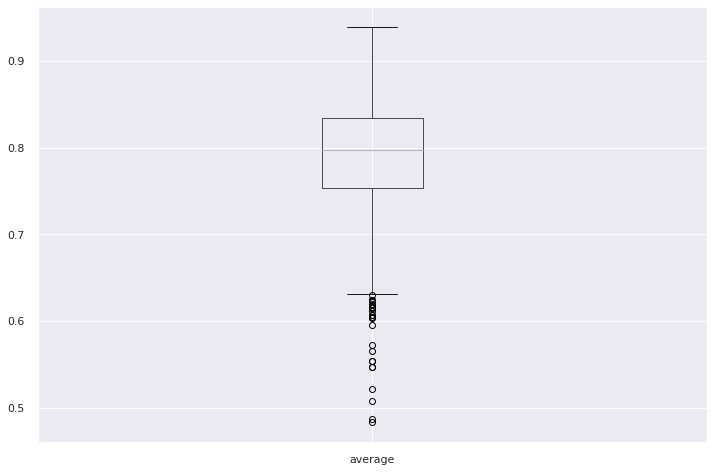

In [310]:
ndf.boxplot(column= 'average')

In [121]:
gdf = gpd.GeoDataFrame(ndf, geometry="Coordinates")

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [312]:
ndf["Calidad"] = np.where(ndf['average']<=0.796923,"Baja","Alta")
#Calidad_baja=ndf['average']<=0.796923)
#Calidad_alta=ndf['average']>=0.796923

0    Alta
1    Alta
2    Alta
3    Alta
4    Baja
Name: Calidad, dtype: object

In [314]:
semaforo_info=ndf.groupby('Calidad')
semaforo_info.describe()

LONGITUD                                                          \
           count        mean       std        min         25%        50%   
Calidad                                                                    
Alta       535.0 -103.237559  4.977617 -116.58073 -105.440155 -102.96398   
Baja       533.0 -100.539403  7.848397 -116.66425 -104.559520 -100.78631   

                              LATITUD             ... FE_score      average  \
                75%       max   count       mean  ...      75%  max   count   
Calidad                                           ...                         
Alta    -100.749755 -86.86412   535.0  23.542947  ...      1.0  1.0   535.0   
Baja     -94.408020 -86.86888   533.0  22.782865  ...      1.0  1.0   533.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Calidad                                                                        
Alta     0.842109  0.032608  0.796923  0.819231  0.834615  0.861538  0.939231  
Baja     0.735634  0.055280  0.483846  0.710000  0.753077  0.780769  0.796154  

[2 rows x 248 columns]

In [315]:
calidad_baja=ndf['Calidad']=='Baja'
calidad_alta=ndf['Calidad']=='Alta'

baja = ndf[calidad_baja]
alta = ndf[calidad_alta]

print(baja.shape)
print(alta.shape)

(533, 72)
(535, 72)


In [316]:
baja.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,...,FLUO_score,DUR_score,COLI_score,NO3_score,CD_score,CR_score,HG_score,PB_score,FE_score,average
count,533.000000,533.000000,533.0,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,...,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,-100.539403,22.782865,2020.0,263.090441,1629.318762,1354.652539,0.814887,512.832591,448.005066,6.053868,...,0.460600,0.385553,0.148330,0.826642,0.996248,0.973734,0.998124,0.977486,0.761726,0.735634
std,7.848397,3.997416,0.0,142.205088,1584.282748,3832.970637,2.070065,434.214699,2474.967992,11.119645,...,0.274367,0.161459,0.136793,0.239847,0.061199,0.160077,0.043315,0.148488,0.426428,0.055280
min,-116.664250,14.732640,2020.0,26.640000,110.000000,101.200000,0.200000,20.000000,1.100000,0.020000,...,0.250000,0.100000,0.100000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483846
25%,-104.559520,20.030090,2020.0,177.650000,840.000000,567.400000,0.216800,238.000000,1.100000,0.729592,...,0.250000,0.250000,0.100000,0.660000,1.000000,1.000000,1.000000,1.000000,1.000000,0.710000
50%,-100.786310,21.076440,2020.0,250.000000,1234.000000,874.000000,0.362600,432.220000,1.100000,2.876000,...,0.250000,0.500000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.753077
75%,-94.408020,25.477340,2020.0,326.610000,1956.000000,1423.000000,0.694600,653.136000,31.000000,7.321045,...,0.500000,0.500000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.780769
max,-86.868880,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,...,1.000000,0.750000,0.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.796154


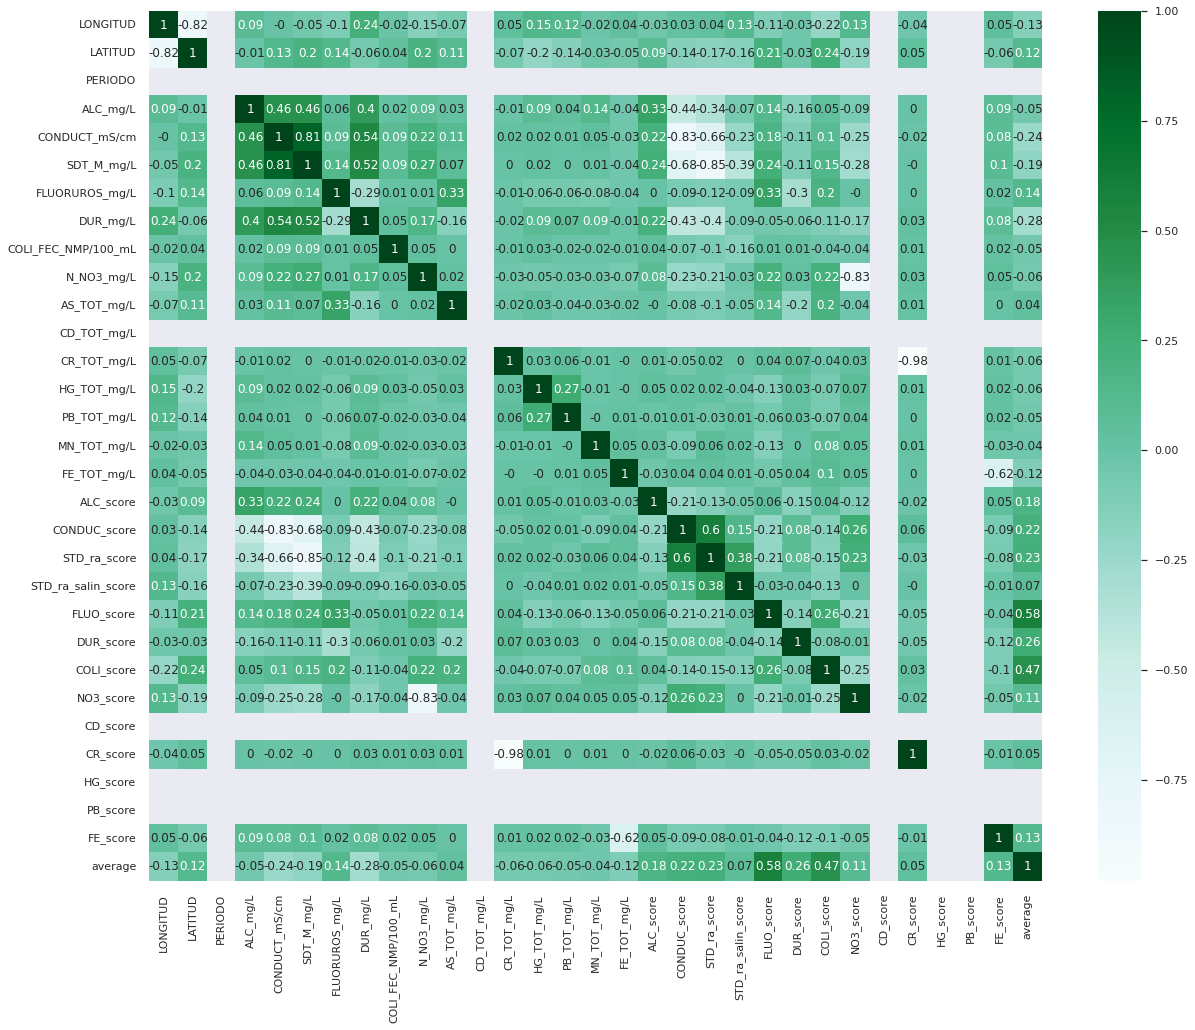

In [321]:
sns.set(rc={'figure.figsize':(20,16)}) 

datos=alta.corr(method='pearson', min_periods=1).round(2)
mapa_corr_pearson = sns.heatmap(datos, annot = True, cmap="BuGn") 


plt.show(mapa_corr_pearson)

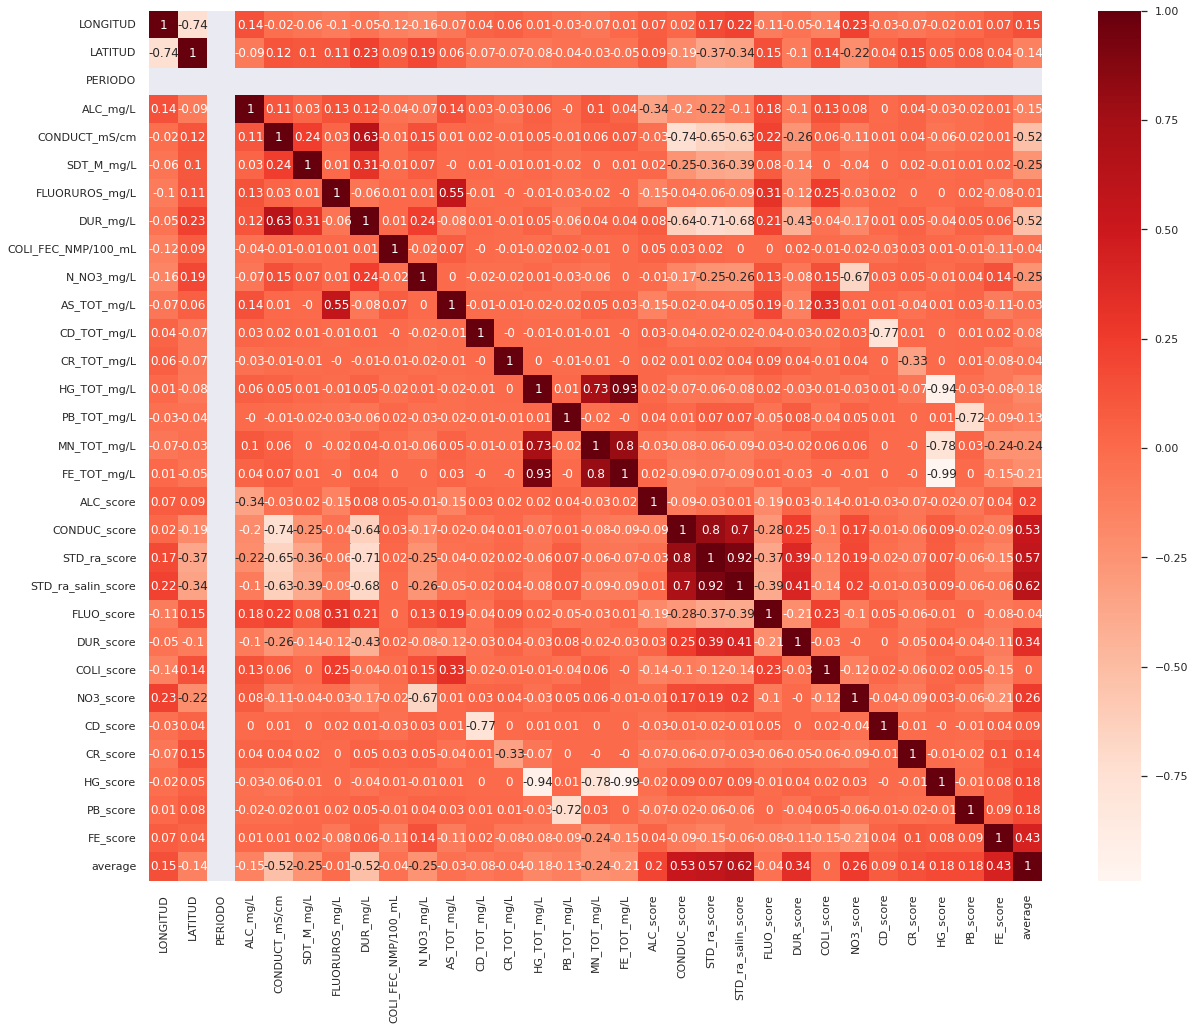

In [322]:
sns.set(rc={'figure.figsize':(20,16)}) 

datos=baja.corr(method='pearson', min_periods=1).round(2)
mapa_corr_pearson = sns.heatmap(datos, annot = True, cmap="Reds") 


plt.show(mapa_corr_pearson)

(533, 72)
(535, 72)


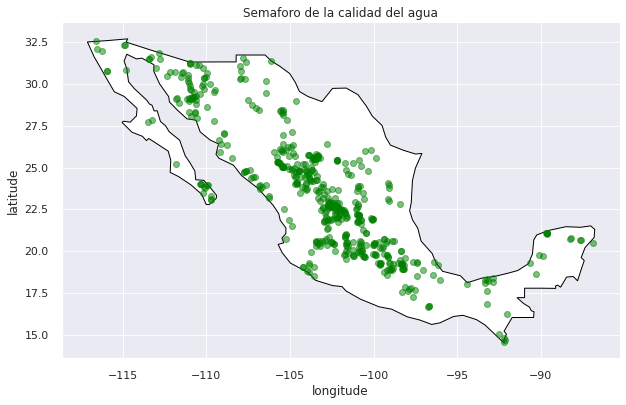

In [340]:
Calidad_baja=ndf['average']<=0.796923
Calidad_alta=ndf['average']>=0.796923

gdf_calidad_baja = gpd.GeoDataFrame(ndf[Calidad_baja], geometry="Coordinates")
gdf_calidad_alta = gpd.GeoDataFrame(ndf[Calidad_alta], geometry="Coordinates")

print(gdf_calidad_baja.shape)
print(gdf_calidad_alta.shape)

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_calidad_alta.plot(ax=gax, color='green', alpha = 0.5)
#gdf_calidad_baja.plot(ax=gax, color='red', alpha = 0.25 )

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semaforo de la calidad del agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

(533, 72)
(535, 72)


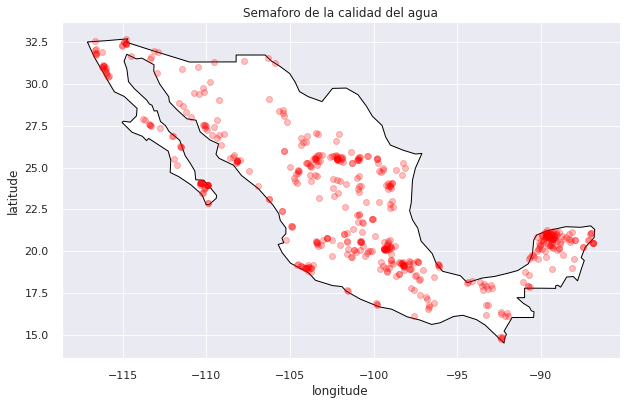

In [341]:
Calidad_baja=ndf['average']<=0.796923
Calidad_alta=ndf['average']>=0.796923

gdf_calidad_baja = gpd.GeoDataFrame(ndf[Calidad_baja], geometry="Coordinates")
gdf_calidad_alta = gpd.GeoDataFrame(ndf[Calidad_alta], geometry="Coordinates")

print(gdf_calidad_baja.shape)
print(gdf_calidad_alta.shape)

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

#gdf_calidad_alta.plot(ax=gax, color='green', alpha = 0.5)
gdf_calidad_baja.plot(ax=gax, color='red', alpha = 0.25 )

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semaforo de la calidad del agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [324]:
import numpy as np
X=latlong
print(X.shape)
X=np.array(X)
X

(1068, 2)


array([[  22.20887, -102.0221 ],
       [  21.99958, -102.20075],
       [  22.36685, -102.28801],
       ...,
       [  25.55197,  -99.82249],
       [  24.80118, -100.32683],
       [  25.0938 , -100.73302]])

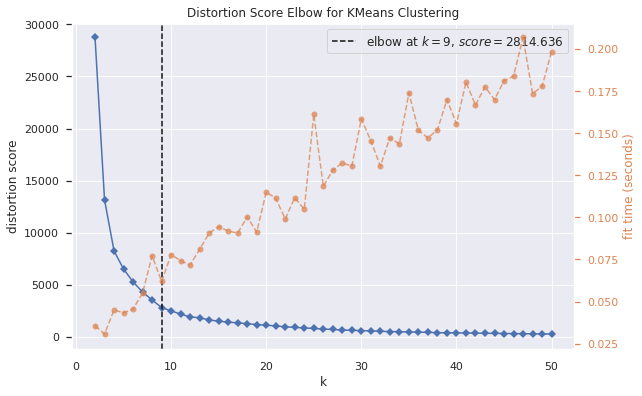

In [328]:
sns.set(rc={'figure.figsize':(9,6)}) 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(50))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [183]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

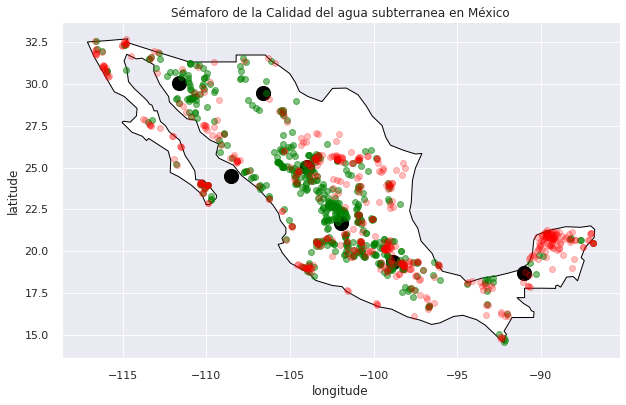

In [342]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200);

gdf_calidad_alta.plot(ax=gax, color='green', alpha = 0.5)
gdf_calidad_baja.plot(ax=gax, color='red', alpha = 0.25 )

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Sémaforo de la Calidad del agua subterranea en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

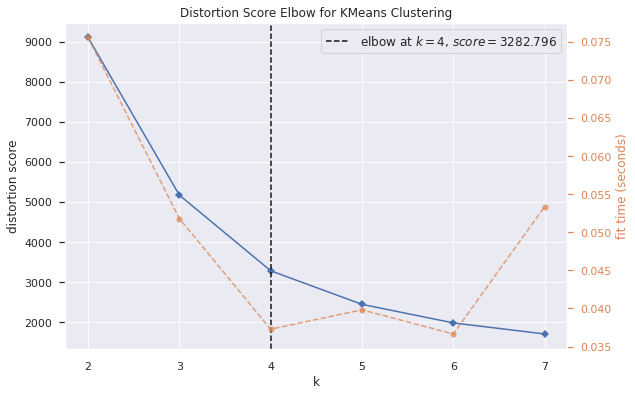

In [378]:
sns.set(rc={'figure.figsize':(9,6)}) 
V=ndf[calidad_alta]
Vlatlong=V[['LATITUD','LONGITUD']]
XV=Vlatlong
XV=np.array(XV)

Vmodel = KMeans()
visualizer = KElbowVisualizer(Vmodel, k=(7))

visualizer.fit(XV)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Calidad alta')

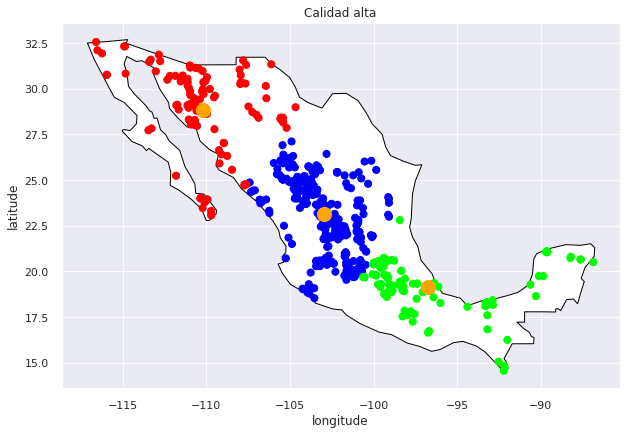

In [379]:
from sklearn.cluster import KMeans
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

kmeans = KMeans(n_clusters=3)
kmeans.fit(XV)
y_kmeans = kmeans.predict(XV)

plt.scatter(XV[:,1],XV[:,0], c=y_kmeans, s=50, cmap='brg')

XVcenters = kmeans.cluster_centers_
plt.scatter(XVcenters[:, 1], XVcenters[:, 0], c='orange', s=200)#, alpha=0.5);

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad alta')

In [380]:
kmeans.inertia_

5170.490525828243

In [381]:
centros=pd.DataFrame(kmeans.cluster_centers_)
centros

,0,1
0,23.135186,-102.961404
1,28.858704,-110.204041
2,19.150517,-96.741977


In [382]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

for i in range(4):
  Latitude = centros.iloc[i,0].astype(str)
  Longitude= centros.iloc[i,1].astype(str)
  location = geolocator.geocode(Latitude+","+Longitude)
  print("\nLocation of the given Latitude and Longitude:")
  print('grupo',i,location)


Location of the given Latitude and Longitude:
grupo 0 Fresnillo, Zacatecas, México

Location of the given Latitude and Longitude:
grupo 1 Cobachi, La Colorada, Sonora, México

Location of the given Latitude and Longitude:
grupo 2 Ejido el Jobo (Jobo Nuevo), Comapa, Veracruz, México


IndexError: ignored

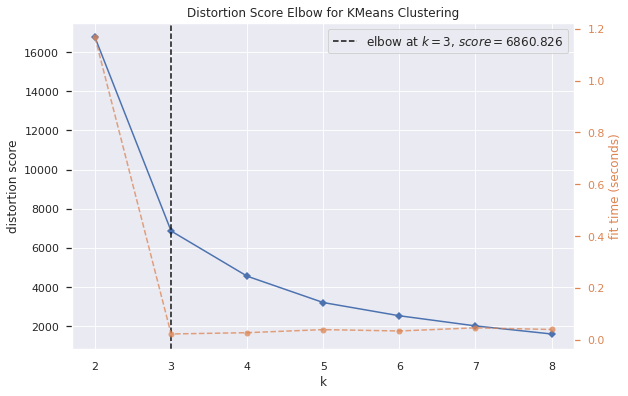

In [383]:
R=ndf[calidad_baja]
Rlatlong=R[['LATITUD','LONGITUD']]
XR=Rlatlong
XR=np.array(XR)

Rmodel = KMeans()
visualizer = KElbowVisualizer(Rmodel, k=(8))

visualizer.fit(XR)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Calidad baja')

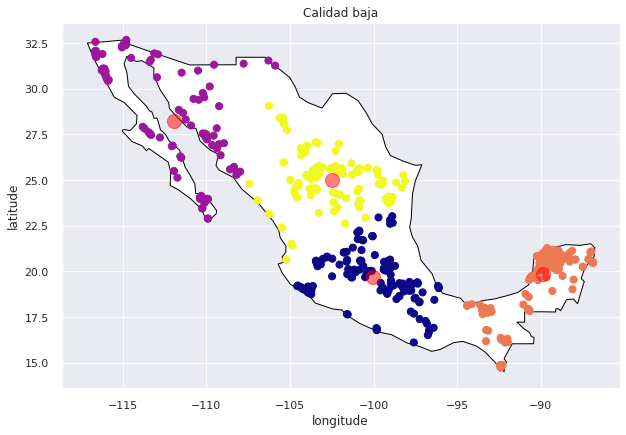

In [384]:
from sklearn.cluster import KMeans
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

kmeans = KMeans(n_clusters=4)
kmeans.fit(XR)
y_kmeans = kmeans.predict(XR)

plt.scatter(XR[:,1],XR[:,0], c=y_kmeans, s=50, cmap='plasma')

XRcenters = kmeans.cluster_centers_
plt.scatter(XRcenters[:, 1], XRcenters[:, 0], c='red', s=200, alpha=0.5);

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad baja')

In [385]:
centros=pd.DataFrame(kmeans.cluster_centers_)
centros

,0,1
0,19.677718,-100.004771
1,28.222987,-111.934756
2,19.849388,-89.901131
3,25.017678,-102.462724


In [386]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

for i in range(4):
  Latitude = centros.iloc[i,0].astype(str)
  Longitude= centros.iloc[i,1].astype(str)
  location = geolocator.geocode(Latitude+","+Longitude)
  print("\nLocation of the given Latitude and Longitude:")
  print('grupo',i,location)


Location of the given Latitude and Longitude:
grupo 0 San Felipe del Progreso, Estado de México, México

Location of the given Latitude and Longitude:
grupo 1 None

Location of the given Latitude and Longitude:
grupo 2 San Juan Bautista, Hopelchén, Campeche, México

Location of the given Latitude and Longitude:
grupo 3 Viesca, Coahuila, México


In [189]:
d=kmeans.transform(X).round(2)
d=pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8
0,2.72,12.94,10.95,1.13,7.71,10.62,16.18,3.83,4.56
1,2.99,13.09,10.95,0.91,7.61,10.68,16.16,3.89,4.57
2,2.73,13.23,10.64,1.28,7.40,10.93,15.88,3.54,4.87
3,2.88,13.21,10.76,1.09,7.46,10.85,15.98,3.69,4.75
4,9.60,21.26,5.92,8.38,1.60,18.63,9.54,6.17,12.39
...,...,...,...,...,...,...,...,...,...
1063,1.18,11.18,11.71,4.53,9.76,10.30,17.09,4.83,5.66
1064,1.03,11.33,11.55,4.46,9.60,10.42,16.94,4.67,5.71
1065,1.31,11.75,11.15,5.06,9.51,11.09,16.53,4.53,6.48
1066,0.43,11.92,10.97,4.16,8.97,10.86,16.36,4.04,5.88


In [190]:
distancias=d.min(axis=1)
distancias.describe()

count    1068.000000
mean        1.427041
std         0.774779
min         0.100000
25%         0.860000
50%         1.300000
75%         1.820000
max         4.810000
dtype: float64

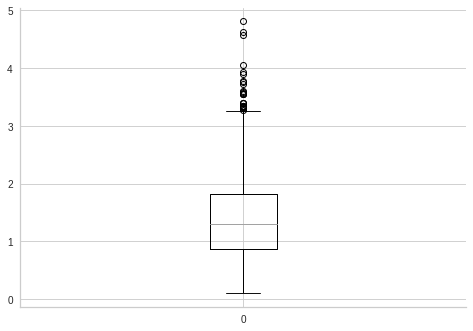

In [191]:
distancias=pd.DataFrame(distancias)
distancias.boxplot()

In [192]:
kmeans.inertia_

2814.636204812299

In [164]:
ndf['CALIDAD_ALC'].value_counts()

Alta                    798
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

In [165]:
ALC=ndf.groupby('CALIDAD_ALC').mean()
ALC['ALC_mg/L']

CALIDAD_ALC
Alta                    246.384768
Baja                     60.813125
Indeseable como FAAP    531.650000
Media                   118.366417
Name: ALC_mg/L, dtype: float64